In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$J(w) = \frac{1}{2} \sum_{i=1}^m (y_i - w^T xi)^2$$

In [39]:
def get_prediction(x, w):
    '''
    Input:
    x -- (N, M)
    w -- (M+1,)
    
    Output:
    pred -- (N,)
    '''
#     w0 = w[0]
#     wm = w[1:]
#     pred = w0 + x.dot(wm)

    pred = x.dot(w)
    
    return pred

In [40]:
def mean_square_loss(y, pred):
    
    J = (y - pred)**2
    J = 0.5 * J.sum()
    
    return J

In [41]:
def compute_gradient(x, y, pred):
    grad = y - pred
    grad = grad.dot(x)
    
    return -grad

In [42]:
def next_weight(w, grad, r):
    
    w = w - r * grad
    
    return w

In [364]:
class LinearRegression(object):
    
    def __init__(self, method='all', tol=1e-10, max_iter=1000):
        
        self.method = method
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, X, y, r=0.01, w_init=False, seed=101):
        
        # add bias term to X
        b = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate([b, X], axis=1)
        
        # initialize weight
        N, M = X.shape
        if w_init:
            np.random.seed(seed)
            self.W = np.random.normal(size=(M))
        else:
            self.W = np.zeros(shape=(M))
            
        # perform gradient descent
        self.loss=[]
        for i in range(self.max_iter):
            
            pred = get_prediction(X, self.W)
            loss = mean_square_loss(y, pred)
            self.loss.append(loss)
            
            if loss < self.tol:
                break
                
            grad = compute_gradient(X, y, pred)
            self.W = next_weight(self.W, grad, r)
            
    def predict(X):
        
        # add bias term to X
        b = np.ones(len(X)).reshape(-1, 1)
        X = np.concatenate([b, X], axis=1)
        
        # get prediction
        y_pred = get_prediction(X, self.W)
        
        return y_pred

In [365]:
x = np.array([[1, 1, -1, 1, 3],
            [-1, 1, 1, 2, -1],
            [2, 3, 0, -4, -1]])
x = x.T

b = np.ones_like(x[:,0]).reshape(-1, 1)
x = np.concatenate([b, x], axis=1)

y = np.array([1, 4, -1, -2, 0])

In [366]:
model = LinearRegression()

In [367]:
model.fit(x, y, r=0.02)

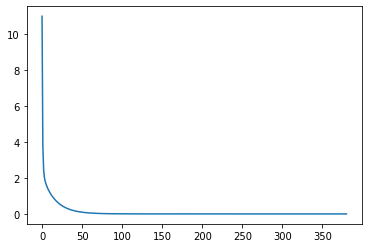

In [369]:
plt.plot(model.loss)

In [355]:
np.float('inf') > 10000000000000000000

True

In [342]:
x = np.array([[1, 1, -1, 1, 3],
            [-1, 1, 1, 2, -1],
            [2, 3, 0, -4, -1]])
x = x.T

b = np.ones_like(x[:,0]).reshape(-1, 1)
x = np.concatenate([b, x], axis=1)

y = np.array([1, 4, -1, -2, 0])

In [347]:
N, M = x.shape

np.random.seed(101)
w = np.random.normal(size=(M))

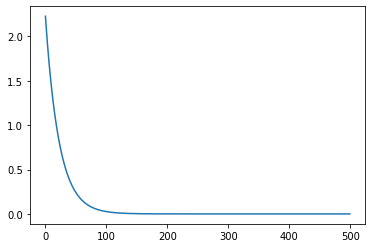

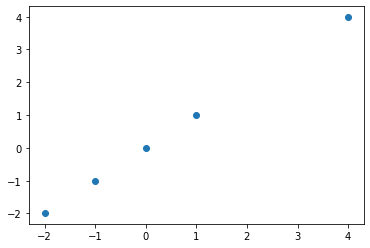

5.148379828563131e-10


In [351]:
iters=500
r=0.02

all_loss=[]
predicted=[]

for i in range(iters):
    pred = get_prediction(x, w)
    loss = mean_square_loss(y, pred)
    grad = compute_gradient(x, y, pred)
    w = next_weight(w, grad, r)
    
    predicted.append(pred)
    all_loss.append(loss)
    
plt.plot(all_loss)
plt.show()
plt.scatter(y, pred)
plt.show()
print(loss)